In [105]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Show Graph

In [104]:
def ShowGraph(a, b, X, Y, line="a+bx"):
    line_x = np.arange(np.amin(X), np.amax(X), 0.01)
    if line == "a+bx":
        line_y = a + b * line_x
    elif line == "ax^b":
        line_y = a * line_x ** b
    elif line == "ae^(bx)":
        line_y = a * np.exp(b*line_x)

    plt.clf()
    plt.plot(line_x, line_y, '-r')
    plt.plot(X, Y, 'ob')
    plt.grid()
    plt.show()

# Error

## Least Square Error

In [110]:
def LeastSquareError(a, b, xi, yi):
    Dt = np.sum((yi - np.average(yi)) ** 2)
    D = np.sum((yi - a - b*xi) ** 2)
    
    r = ((Dt-D)/Dt) ** 0.5
    
    return r

# Linear Regression &rarr; y = a + bx

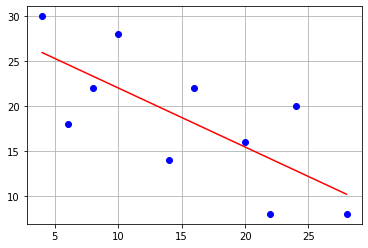

y = a + bx

a: 28.585106382978722
b: -0.6569148936170213
least suqare error: 0.7231812135292409


In [111]:
def LinearRegression(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'xiyi': X_data*Y_data,
        'xi2': X_data*X_data
    })

    x_bar = np.average(data['xi'])
    y_bar = np.average(data['yi'])

    b = (n * np.sum(data['xiyi']) - np.sum(data['xi']) *
         np.sum(data['yi']))/(n * np.sum(data['xi2']) - np.sum(data['xi'])**2)
    a = y_bar - b * x_bar

    if showGraph:
        ShowGraph(a, b, data['xi'], data['yi'])

    if showData:
        print("linear regression data")
        print(data)
        print()

    return [a, b]


X_data = np.array([4, 6, 8, 10, 14, 16, 20, 22, 24, 28])
Y_data = np.array([30, 18, 22, 28, 14, 22, 16, 8, 20, 8])

a, b = LinearRegression(X_data, Y_data, showGraph=True, showData=False)
print("y = a + bx\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))

# Non-Linear Regression

## y = ax^b

linear regression data
         xi        yi      xiyi       xi2
0  0.000000 -0.301030 -0.000000  0.000000
1  0.301030  0.230449  0.069372  0.090619
2  0.477121  0.531479  0.253580  0.227645
3  0.602060  0.755875  0.455082  0.362476
4  0.698970  0.924279  0.646043  0.488559



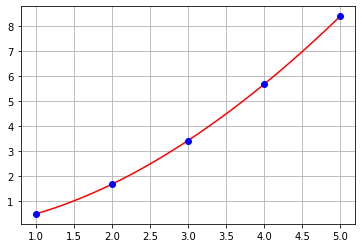

non-linear regression data (y = ax^b)
pi = log(xi)
qi = log(yi)
   xi   yi        pi        qi
0   1  0.5  0.000000 -0.301030
1   2  1.7  0.301030  0.230449
2   3  3.4  0.477121  0.531479
3   4  5.7  0.602060  0.755875
4   5  8.4  0.698970  0.924279

y = ax^b

a: 0.500933649097749
b: 1.75172364807736
least suqare error: 0.7436183127152611


In [114]:
def NonLinearRegression1(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'pi': np.log10(X_data),
        'qi': np.log10(Y_data)
    })

    a, b = LinearRegression(data['pi'], data['qi'],
                            showGraph=False, showData=showData)
    a = 10 ** a

    if showGraph:
        ShowGraph(a, b, X_data, Y_data, line="ax^b")

    if showData:
        print("non-linear regression data (y = ax^b)")
        print("pi = log(xi)")
        print("qi = log(yi)")
        print(data)
        print()

    return [a, b]


X_data = np.array([1, 2, 3, 4, 5])
Y_data = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

a, b = NonLinearRegression1(X_data, Y_data, showGraph=True, showData=True)
print("y = ax^b\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))

## y = ae^(bx)

linear regression data
   xi        yi       xiyi  xi2
0   1 -0.693147  -0.693147    1
1   2  0.530628   1.061257    4
2   3  1.223775   3.671326    9
3   4  1.740466   6.961865   16
4   5  2.128232  10.641159   25



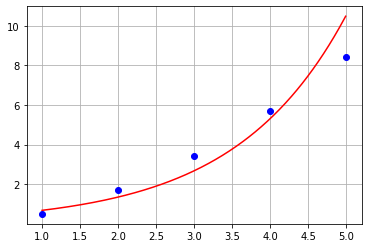

non-linear regression data (y = ae^(bx))
qi = log(yi)
   xi   yi  pi        qi
0   1  0.5   1 -0.693147
1   2  1.7   2  0.530628
2   3  3.4   3  1.223775
3   4  5.7   4  1.740466
4   5  8.4   5  2.128232

y = ae^(bx)

a: 0.34308130042789264
b: 0.6852595696596763
least suqare error: 0.5130828465854856


In [113]:
def NonLinearRegression2(X_data, Y_data, showGraph=True, showData=True):
    if X_data.size != Y_data.size:
        print("banyak data X dan Y tidak sama!")
        exit()

    n = X_data.size
    data = pd.DataFrame({
        'xi': X_data,
        'yi': Y_data,
        'pi': X_data,
        'qi': np.log(Y_data)
    })

    a, b = LinearRegression(data['pi'], data['qi'],
                            showGraph=False, showData=showData)
    a = np.exp(a)

    if showGraph:
        ShowGraph(a, b, X_data, Y_data, line="ae^(bx)")

    if showData:
        print("non-linear regression data (y = ae^(bx))")
        print("qi = log(yi)")
        print(data)
        print()

    return [a, b]


X_data = np.array([1, 2, 3, 4, 5])
Y_data = np.array([0.5, 1.7, 3.4, 5.7, 8.4])

a, b = NonLinearRegression2(X_data, Y_data, showGraph=True, showData=True)
print("y = ae^(bx)\n")
print("a:", a)
print("b:", b)
print("least suqare error:", LeastSquareError(a, b, X_data, Y_data))